In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import re , os
from bs4 import BeautifulSoup as bs
import pandas as pd
from hdfs import InsecureClient
from datetime import datetime # datetime 모듈 임포트
from dotenv import load_dotenv
# .env 파일 로드
load_dotenv()

# 환경 변수 사용
# email = os.getenv("EMAIL")
# passwd = os.getenv("PASSWORD")
# print(email,passwd)

True

In [2]:
# Chrome 옵션 설정
options = Options()
options.binary_location = "..\\chrome-win64\\chrome.exe" # chrome 경로 설정
options.add_argument("--no-sandbox") # sandbox 설정
# options.add_argument("--headless=new")  # 헤드리스
options.add_argument("--disable-dev-shm-usage") # 공유메모리 설정
options.add_argument("--window-size=1920,1080") # 화면크기설정 , 반응형 웹 대비
options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.5672.126 Safari/537.36")
# options.add_argument("--disable-gpu") # GPU 비활성화

# ChromeDriver 설정
service = Service("..\\chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)
driver.get("https://www.instagram.com/")  # https://www.opinet.co.kr/searRgSelect.do
print(driver.title)
time.sleep(3) # 페이지 로드 기다림

email = os.getenv("EMAIL")
passwd = os.getenv("PASSWORD")
print("로그인시도 아이디/비밀번호")

# 아이디(이메일) 기입
input_id = driver.find_element(By.CSS_SELECTOR, "#loginForm > div.x9f619.xjbqb8w.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.xqui205.x1n2onr6.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1 > div:nth-child(1) > div > label > input")
input_id.clear()
time.sleep(1)
input_id.send_keys(email)
time.sleep(1)

# 비번 기입
input_pw = driver.find_element(By.CSS_SELECTOR, "#loginForm > div.x9f619.xjbqb8w.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.xqui205.x1n2onr6.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1 > div:nth-child(2) > div > label > input") 
input_pw.clear()
input_pw.send_keys(passwd)
time.sleep(1)
print("아이디 및 비번입력완료")

# 학인 및 이동
submit = driver.find_element(By.CSS_SELECTOR, "#loginForm > div.x9f619.xjbqb8w.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.xqui205.x1n2onr6.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1 > div:nth-child(3)")
submit.click()
print("확인 및 이동")
time.sleep(10)

try:
    popup = driver.find_element(By.CSS_SELECTOR, "div.x1gryazu.xh8yej3.x10o80wk.x14k21rp.x17snn68.x6osk4m.x1porb0y.x8vgawa > section > main > div > div > div > div")
    popup.click()
    time.sleep(3)
except:    
    pass

def insta_search(inword):
    url_ori = f"https://www.instagram.com/explore/search/keyword/?q={inword}"
    return url_ori

word = "프로그래머"
url = insta_search(word)
driver.get(url)
print(f"{word}의 검색시작!!🐧")
time.sleep(10)

# 로드 결과
wait = WebDriverWait(driver, 10)
select_box1 = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"div.x78zum5.xdt5ytf.xwrv7xz.x1n2onr6.xph46j.xfcsdxf.xsybdxg.x1bzgcud > div > div:nth-child(1) > div:nth-child(1) > div > a")))
select_box1.click()
print("첫카드 클릭")
time.sleep(7)
info = []
heart = []
times = []
for n in range(20):
    html = driver.page_source
    soup = bs(html, 'html.parser')
    # 1. 본문내용 가져오기
    content = soup.select_one('div._a9zr').get_text()
    info.append(content)
    heartrate = soup.select_one("section.x12nagc.x182iqb8.x1pi30zi.x1swvt13 > div > div > span > a > span").get_text()
    heart.append(heartrate)       
    print("본문내용",content)
    time.sleep(2)
    nextBt = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'button._abl- svg[aria-label="다음"]')))
    nextBt.click()
    time.sleep(3)    

Instagram
로그인시도 아이디/비밀번호
아이디 및 비번입력완료
확인 및 이동
프로그래머의 검색시작!!🐧
첫카드 클릭
본문내용 best_dotoryㅋㅋㅋㅋㅋ자연스럽게나오는 컴퓨터쟁란ㅋㅋㅋㅋ..#유머 #유머스타그램 #내컴퓨터 #컴퓨터 #프로그래밍 #프로그래머 #일상 #it #직장인 #면접 #사회초년생 #덕후 #개발자213주
본문내용 amujunsu요 주제는 예전에 다뤘는데도 비슷한 질문이 최근까지 꽤 많았어서 다른 방법에  대한 내용을 올리게 되었어요. "이런 방법도 있다" 라는 가설이지만 이미 미국 IT전문가들로부터 의심하는 주장이 제기되었던 즉 충분히 기술적으로 가능한 방법입니다. 집요한 인스타나 구글등빅테크들이야 당연히 수단, 방법 가리지 않고 타겟광고 할 궁리만 하고 있을테니까~가속도계 센서는 지진감지용오로도 사용되는 선한 목적이 있습니다. 한명의 특이한 진동은 의미가 없지만 해당지역에서 수많은 사람에게 동일한 파장의 진동이 있었다면 그걸로 지진을 측정하는 것이지요....#센서 #엔지니어 #프로그래머 #코더 #지진 #코딩 #개발자 #인스타 #공대 #문과 #이과 #해커#애플 #엔팁 #측정 #가속도 #동의 #개발 #테크툰 #스케치 #드로잉 #그림일기 #직장인#만화 #인스타툰 #그림일기 #그림러 #타겟 #데이터수정됨 · 138주
본문내용 have_a_life77베댓 진짜ㅋㅋㅋㅋㅋㅋ#고단한 #프로그래머 #개발자 #힘내자 ..#유머 #영화 #토요일 #배고파 #선팔환영192주
본문내용 modoosasoo#질문없는성장은없다우리가 일을 통해 버는 돈은고객이 자신의 문제를 해결해달라고지불한 돈입니다.-질문하지 않으면 성장도 없습니다.읽고 질문하세요.우리는 반드시 성장할 수 있습니다.124주
본문내용 j.anagram인증됨비 오는 날, #증심사 에서의 #템플스테이 ☔️ 강연 끝나고 달려간 증심사밤 늦게 캠프파이어를 즐기고 🔥 📆 4:30am 새벽 #명상- 일찍 일어난 사람에게 주는 선물이라고 스님에게 팔찌 받고📆 6:00am 아침 공양- 나물과 밥, 과일로 구성된 사찰

In [3]:
# service.stop()

In [6]:
for i, (n ,m ) in enumerate(zip(info,heart), 1):
    print(i,'번째 정보:\n',n,'\n❤️',m)
    print("="*100)

1 번째 정보:
 best_dotoryㅋㅋㅋㅋㅋ자연스럽게나오는 컴퓨터쟁란ㅋㅋㅋㅋ..#유머 #유머스타그램 #내컴퓨터 #컴퓨터 #프로그래밍 #프로그래머 #일상 #it #직장인 #면접 #사회초년생 #덕후 #개발자213주 
❤️ 좋아요 116개
2 번째 정보:
 amujunsu요 주제는 예전에 다뤘는데도 비슷한 질문이 최근까지 꽤 많았어서 다른 방법에  대한 내용을 올리게 되었어요. "이런 방법도 있다" 라는 가설이지만 이미 미국 IT전문가들로부터 의심하는 주장이 제기되었던 즉 충분히 기술적으로 가능한 방법입니다. 집요한 인스타나 구글등빅테크들이야 당연히 수단, 방법 가리지 않고 타겟광고 할 궁리만 하고 있을테니까~가속도계 센서는 지진감지용오로도 사용되는 선한 목적이 있습니다. 한명의 특이한 진동은 의미가 없지만 해당지역에서 수많은 사람에게 동일한 파장의 진동이 있었다면 그걸로 지진을 측정하는 것이지요....#센서 #엔지니어 #프로그래머 #코더 #지진 #코딩 #개발자 #인스타 #공대 #문과 #이과 #해커#애플 #엔팁 #측정 #가속도 #동의 #개발 #테크툰 #스케치 #드로잉 #그림일기 #직장인#만화 #인스타툰 #그림일기 #그림러 #타겟 #데이터수정됨 · 138주 
❤️ 좋아요 6350개
3 번째 정보:
 have_a_life77베댓 진짜ㅋㅋㅋㅋㅋㅋ#고단한 #프로그래머 #개발자 #힘내자 ..#유머 #영화 #토요일 #배고파 #선팔환영192주 
❤️ 좋아요 2.3만개
4 번째 정보:
 modoosasoo#질문없는성장은없다우리가 일을 통해 버는 돈은고객이 자신의 문제를 해결해달라고지불한 돈입니다.-질문하지 않으면 성장도 없습니다.읽고 질문하세요.우리는 반드시 성장할 수 있습니다.124주 
❤️ 좋아요 237개
5 번째 정보:
 j.anagram인증됨비 오는 날, #증심사 에서의 #템플스테이 ☔️ 강연 끝나고 달려간 증심사밤 늦게 캠프파이어를 즐기고 🔥 📆 4:30am 새벽 #명상- 일찍 일어난 사람에게 주는 선물이라고 스님에게 팔찌 받고📆 6:00am 아침 공양- 나물과 밥,

['자연', '컴퓨터', '쟁란', '주제', '예전', '질문', '최근', '다른', '방법', '대한', '내용', '방법', '가설', '미국', '전문가', '로부터', '의심', '주장', '제기', '기술', '방법', '인스타', '구글', '등빅', '테크', '수단', '방법', '타겟', '광고', '궁리', '가속도계', '센서', '지진', '사용', '목적', '명의', '진동', '의미', '해당', '지역', '사람', '파장', '진동', '지진', '측정', '이지', '애플', '만화', '베댓', '진짜', '고단', '질문', '성장', '우리', '통해', '고객', '자신', '문제', '해결', '지불', '질문', '성장', '질문', '우리', '반드시', '인증', '강연', '증심사', '캠프파이어', '새벽', '일찍', '사람', '선물', '스님', '팔찌', '아침', '공양', '나물', '과일', '구성', '찰밥', '스타일', '스스로', '설거지', '마음', '올챙이', '구경', '뿌리', '이주', '경험', '지스', '스님', '과거', '시절', '현실', '해외', '스님', '이야기', '무언가', '무언가', '실망', '자신', '생각', '생활', '지금', '자신', '이야기', '생각', '이야기', '단체', '주어', '내용', '확신', '이야기', '다른', '이의', '생각', '질문', '생각', '생각', '깨달음', '이야기', '템플스테이', '생기', '이야기', '단청', '키링', '만들기', '오방', '사용', '단청', '키링', '만들기', '싱잉볼', '전체', '프로그램', '깨달음', '시간', '깨달음', '잠깐', '다른', '보고', '경험', '잠결', '얼굴', '보너스', '초대', '재형', '친구', '동생', '언니', '이틀', '광주', '무등산', '동구', '다음', '추천', '해커', '화가', '클린', '코드

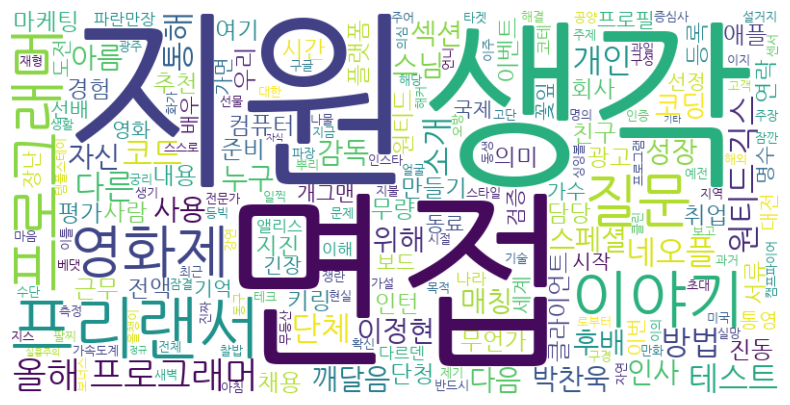

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from konlpy.tag import Komoran
from konlpy.tag import Okt
word =  ", ".join(info)
okt = Okt()
text = okt.nouns(word)
text = [n for n in text if len(n)> 1]
print(text)
nouns_text = ', '.join(text)
# 워드클라우드 생성
font_path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(nouns_text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()